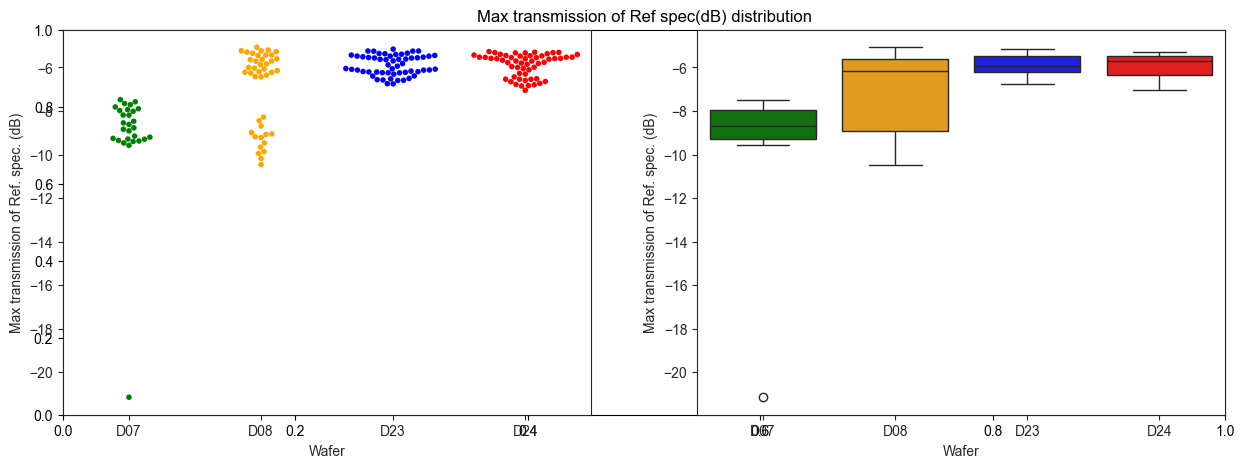

In [1]:
# 2021080328 changyongkun
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

csv_file = './res/csv/20240605T031652.csv'

df = pd.read_csv(csv_file)

fig = plt.figure(figsize=(15, 5))
plt.title('Max transmission of Ref spec(dB) distribution')

sns.set_style('ticks')

area01 = fig.add_subplot(1, 2, 1)
area02 = fig.add_subplot(1, 2, 2)

palette = ['g', 'orange', 'b', 'r']

sns.swarmplot(x = 'Wafer', y = 'Max transmission of Ref. spec. (dB)', hue='Wafer', data=df, ax=area01, palette=palette, s=4)
sns.boxplot(x = 'Wafer', y = 'Max transmission of Ref. spec. (dB)', hue='Wafer', data=df, ax=area02, palette=palette)

plt.show()

4it [00:03,  1.26it/s]


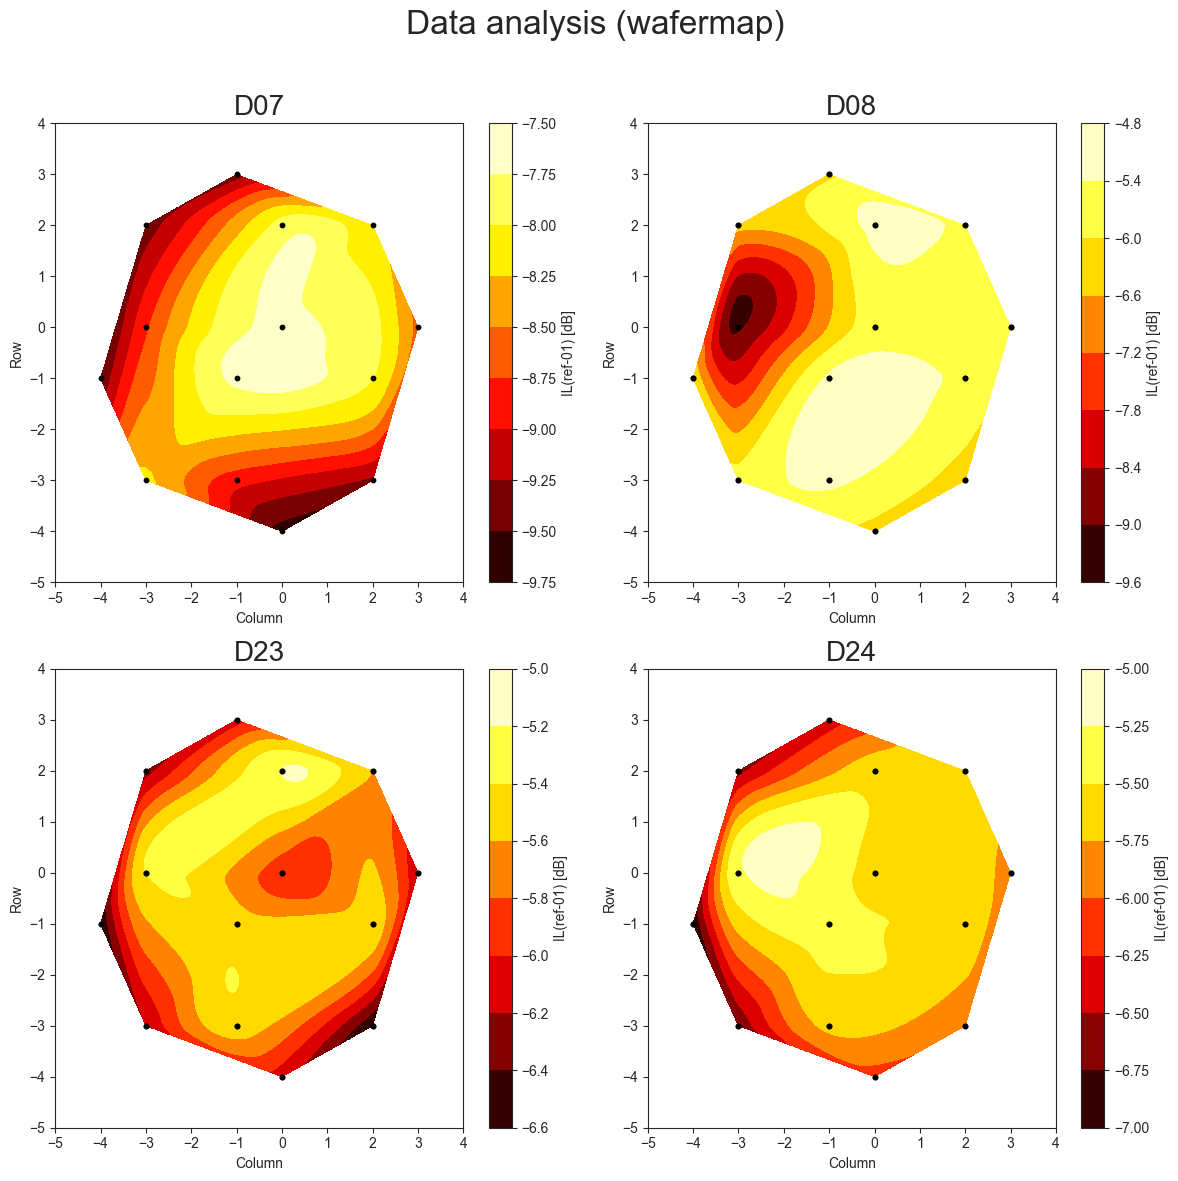

In [31]:
import numpy as np
from scipy.interpolate import griddata
from tqdm import tqdm

data_file = './panda1.xlsx'
data = pd.read_excel(data_file, sheet_name = 0)

# wafer_values = data['Wafer'].tolist()
wafer_values = ['D07', 'D08', 'D23', 'D24']
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot for D03
for i, wafer in tqdm(enumerate(wafer_values)):
    subset = data[data['Wafer'] == wafer]
    rows = subset['Row'].tolist()
    columns = subset['Column'].tolist()
    values = [v.strip('[').strip(']') for v in subset['Max transmission of Ref. spec. (dB)'].tolist()]

    points = np.array(list(zip(rows, columns)))
    grid_x, grid_y = np.mgrid[min(rows)-1:max(rows)+1:1000j, min(columns)-1:max(columns)+1:1000j]
    grid_z = griddata(points, values, (grid_x, grid_y), method='cubic')

    ax = axes[i//2][i%2]

    contour = ax.contourf(grid_x, grid_y, grid_z, cmap=plt.get_cmap('hot'))
    plt.colorbar(contour, label='IL(ref-01) [dB]')
    ax.scatter(rows, columns, color='k', s=10)
    ax.set_title(wafer, fontsize=20)
    ax.set_xlabel('Column')
    ax.set_ylabel('Row')

plt.suptitle('Data analysis (wafermap)', fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Plot the figure
plt.show()